> Yann LeCun famously said that “if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake”

> *Clustering*: the goal is to group similar instances together into clusters. This is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more

>*Anomaly detection*: the objective is to learn what “normal” data looks like, and use this to detect abnormal instances, such as defective items on a production line or a new trend in a time series

>*Density estimation*: this is the task of estimating the probability density function (PDF) of the random process that generated the dataset. This is commonly used for anomaly detection: **instances located in very low-density regions are likely to be anomalies**. It is also useful for data analysis and visualization

#Clustering

**Clustering: it is the task of identifying similar instances and assigning them to clusters, i.e., groups of similar instances.** Just like in classification, each instance gets assigned to a group. However, this is an unsupervised task

Consider Figure 9-1: on the left is the iris dataset, where each instance’s species (i.e., its class) is represented with a different marker. It is a labeled dataset, for which classification algorithms such as Logistic Regression, SVMs or Random Forest classifiers are well suited

On the right is the same dataset, but without the labels, so you cannot use a classification algorithm anymore. This is where clustering algorithms step in: many of them can easily detect the lower-left cluster. It is also quite easy to see with our own eyes, but it is not so obvious that the upper-right cluster is composed of two distinct sub-clusters.

That said, the dataset has two additional features (sepal length and width), not represented here, and clustering algorithms can make good use of all features, so in fact they identify the three clusters fairly well (e.g., using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster)

<p align='center'>
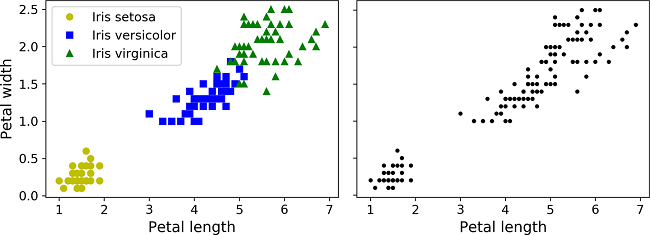
</p>
Figure 9-1. Classification (left) versus clustering (right)

Clustering is used in a wide variety of applications, including these:

**For customer segmentation**
* You can cluster your customers based on their purchases and their activity on your website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment

* For example, customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed

**For data analysis**
* When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately

**As a dimensionality reduction technique**
* Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k-dimensional

* This vector is typically much lower-dimensional than the original feature vector, but it can preserve enough information for further processing

**For anomaly detection (also called outlier detection)**
* Any instance that has a low affinity to all the clusters is likely to be an anomaly

* For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection

**For semi-supervised learning**

* If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance

**For search engines**

*  Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is use the trained clustering model to find this image’s cluster, and you can then simply return all the images from this cluster

**To segment an image**

* By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object


**Some algorithms look for instances centered around a particular point, called a centroid**. Others look for continuous regions of densely packed instances: these clusters can take on any shape. Some algorithms are hierarchical, looking for clusters of clusters

## K-Means

Consider the unlabeled dataset represented in Figure 9-2: you can clearly see five blobs of instances. The K-Means algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations



<p align='center'>
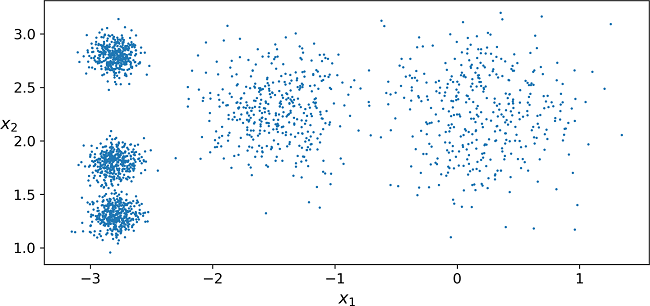
</p>
Figure 9-2. An unlabeled dataset composed of five blobs of instances

Let's start by generating some blobs

In [1]:
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Let’s train a K-Means clusterer on this dataset. It will try to find each blob’s center and assign each instance to the closest blob


In [3]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

Note that you have to specify the number of clusters k that the algorithm must find. In this example, it is pretty obvious from looking at the data that k should be set to 5

Each instance was assigned to one of the five clusters. In the context of clustering, an instance’s label is the index of the cluster that this instance gets assigned to by the algorithm: this is not to be confused with the class labels in classification (remember that clustering is an unsupervised learning task)

The KMeans instance preserves a copy of the labels of the instances it was trained on, available via the labels_ instance variable:

In [4]:
y_pred

array([0, 4, 1, ..., 3, 1, 4], dtype=int32)

In [5]:
y_pred is kmeans.labels_

True

We can also take a look at the five centroids that the algorithm found:

In [6]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

You can easily assign new instances to the cluster whose centroid is closest:

In [7]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

If you plot the cluster’s decision boundaries, you get a Voronoi tessellation (see Figure 9-3, where each centroid is represented with an X)

<p align='center'>
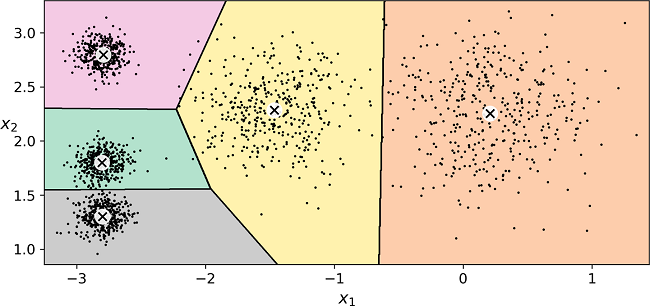
</p>
Figure 9-3. K-Means decision boundaries (Voronoi tessellation)

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled (especially near the boundary between the top-left cluster and the central cluster). Indeed, the K-Means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid

**Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering**

The score can be the distance between the instance and the centroid; conversely, it can be a similarity score (or affinity), such as the Gaussian Radial Basis Function (introduced in Chapter 5)

In the KMeans class, the transform() method measures the distance from each instance to every centroid:

In [8]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 1.49439034, 2.9042344 , 2.81093633],
       [5.84236351, 2.80290755, 4.4759332 , 5.84739223, 5.80730058],
       [1.71086031, 3.29399768, 1.69136631, 0.29040966, 1.21475352],
       [1.21567622, 3.21806371, 1.54808703, 0.36159148, 0.72581411]])

In this example, the first instance in X_new is located at a distance of 2.81 from the first centroid, 0.33 from the second centroid, 2.90 from the third centroid, 1.49 from the fourth centroid, and 2.89 from the fifth centroid

If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique

The computational complexity of the algorithm is generally linear with regard to the number of instances m, the number of clusters k, and the number of dimensions n. However, this is only true when the data has a clustering structure. If it does not, then in the worst-case scenario the complexity can increase exponentially with the number of instances. In practice, this rarely happens, and K-Means is generally one of the fastest clustering algorithms

### The K-Means algorithm

So, how does the algorithm work? Well, suppose you were given the centroids. You could easily label all the instances in the dataset by assigning each of them to the cluster whose centroid is closest. Conversely, if you were given all the instance labels, you could easily locate all the centroids by computing the mean of the instances for each cluster

But you are given neither the labels nor the centroids, so how can you proceed? Well, **just start by placing the centroids randomly (e.g., by picking k instances at random and using their locations as centroids). Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving**

The algorithm is guaranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever

You can see the algorithm in action in Figure 9-4: the centroids are initialized randomly (top left), then the instances are labeled (top right), then the centroids are updated (center left), the instances are relabeled (center right), and so on. As you can see, in just three iterations, the algorithm has reached a clustering that seems close to optimal



<p align='center'>
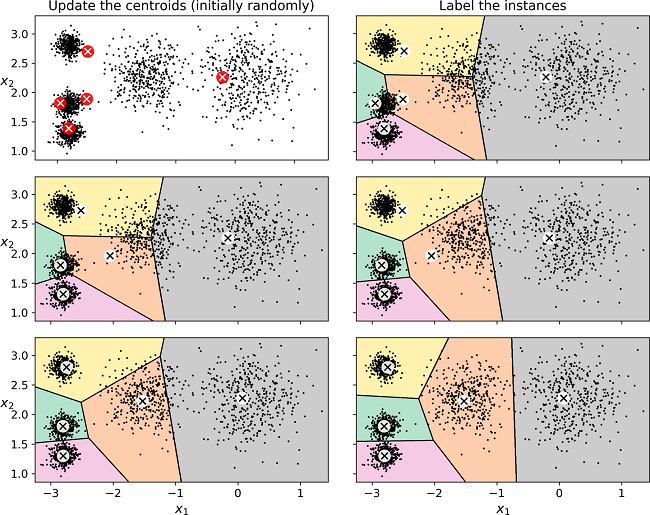
</p>
Figure 9-4. The K-Means algorithm

Although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., it may converge to a local optimum): whether it does or not depends on the centroid initialization

Figure 9-5 shows two suboptimal solutions that the algorithm can converge to if you are not lucky with the random initialization step

<p align='center'>
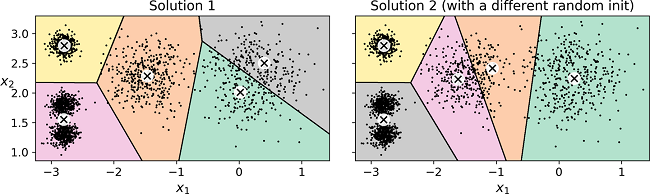
</p>
Figure 9-5. Suboptimal solutions due to unlucky centroid initializations

### Centroid initialization methods

If you happen to know approximately where the centroids should be (e.g.,
if you ran another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1:

In [9]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [10]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True,
       init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       max_iter=300, n_clusters=5, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. **The number of random initializations is controlled by the n_init hyperparameter: by default, it is equal to 10, which means that the whole algorithm describer earlier runs 10 times when you call fit(), and Scikit-Learn keeps the best solution**

But how exactly does it know which solution is the best? **It uses a performance metric! That metric is called the model’s inertia, which is the mean squared distance between each instance and its closest centroid**

It is roughly equal to 223.3 for the model on the left in Figure 9-5, 237.5 for the model on the right in Figure 9-5, and 211.6 for the model in Figure 9-3

The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia. 

In this example, the model in Figure 9-3 will be selected (unless we are very unlucky with n_init consecutive random initalizations)

If you are curious, a model’s inertia is accessible via the inertia_ instance variable:

In [11]:
kmeans.inertia_

211.5985372581684

**The score() method returns the negative inertia**

Why negative? Because a predictor’s score() method must always respect Scikit-Learn's “greater is better” rule: if a predictor is better than another, its score() method should return a greater score

In [12]:
kmeans.score(X)

-211.59853725816856

An important improvement to the K-Means algorithm, K-Means ++, was proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii

They introduced a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge to a suboptimal solution

Here is the K-Means++ initialization algorithm:

* Take one centroid $c^{(1)}$, chosen uniformly at random from the dataset

* Take a new centroid $c^{(i)}$, choosing an instance $x^{(i)}$ with probability $D(x^{(i)})^2 \over \sum^m_{j=1} D(x^{(j)})^2$, where $D(x^{(i)})$ is the distance between the instance $x^{(i)}$ and the closest centroid that was already chosen. This probability distribution ensures that instances farther away from already chosen centroids are much more likely be selected as centroids

* Repeat the previous step until all k centroids have been chosen

The KMeans class uses this initialization method by default. If you want to force it to use the original method (i.e., picking k instances randomly to define the initial centroids), then you can set the init hyperparameter to 'random'

### Accelerated K-Means and mini-batch K-Means

Another important improvement to the K-Means algorithm was proposed in a 2003 paper by Charles Elkan. It considerably accelerates the algorithm by avoiding many unnecessary distance calculations

Elkan achieved this by exploiting the triangle inequality (i.e., that a straight line is always the shortest distance between two points ) and by keeping track of lower and upper bounds for distances between instances and centroids

This is the algorithm the KMeans class class uses by default (you can force it to use the original algorithm by setting the algorithm hyperparameter to 'full'

Yet another important variant of the K-Means algorithm was proposed in a 2010 paper by David Sculley. Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory

Scikit-Learn implements this algorithm in the MiniBatchKMeans class. You can just use this class like the KMeans class:

In [13]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

If the dataset does not fit in memory, the simplest option is to use the memmap class, as we did for incremental PCA in Chapter 8. Alternatively, you can pass one mini-batch at a time to the partial_fit() method

Although the Mini-batch K-Means algorithm is much faster than the regular K-Means algorithm, its inertia is generally slightly worse, especially as the number of clusters increases

You can see this in Figure 9-6: the plot on the left compares the inertias of Mini-batch K Means and regular K-Means models trained on the previous dataset using various numbers of clusters k



<p align='center'>
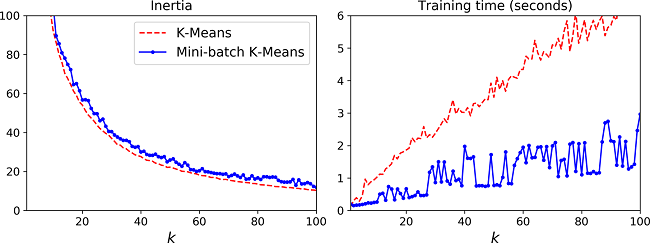
</p>
Figure 9-6. Mini-batch K-Means has a higher inertia than K-Means (left) but it is much faster
(right), especially as k increases

The difference between the two curves remains fairly constant, but this difference becomes more and more significant as k increases, since the inertia becomes smaller and smaller

In the plot on the right, you can see that Mini-batch K-Means is much faster than regular K-Means, and this difference increases with k

### Finding the optimal number of clusters